Practical: 04
Asita Ganatra, 22070521003

Dataset Shape: (150, 2)
k=1, Accuracy=0.71
k=3, Accuracy=0.80
k=5, Accuracy=0.80
k=7, Accuracy=0.80
k=9, Accuracy=0.82
k=11, Accuracy=0.73


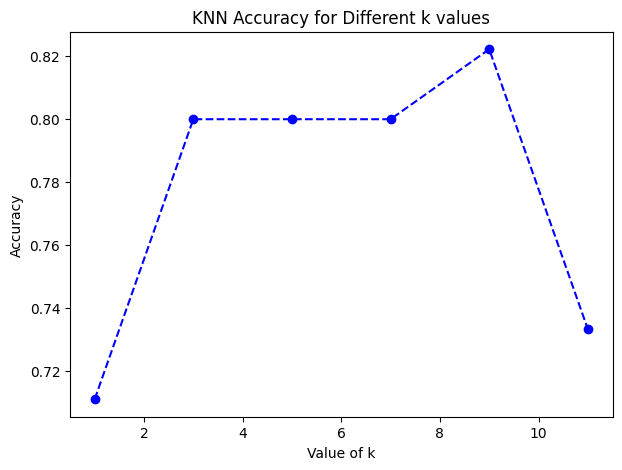

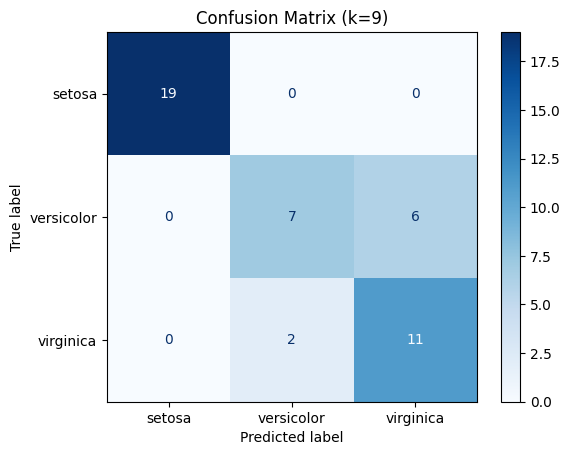

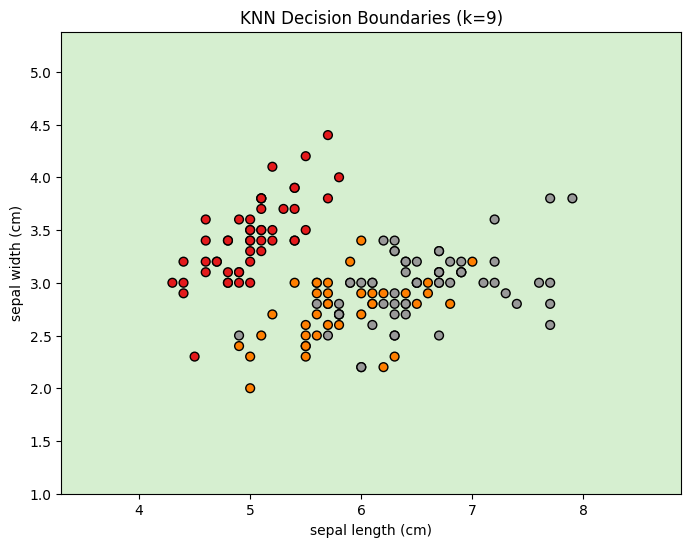

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


#Load Dataset
iris = load_iris()
X = iris.data[:, :2]   # taking only first 2 features for decision boundary visualization
y = iris.target
print("Dataset Shape:", X.shape)

#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Standardize Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Train KNN with different values of k
k_values = [1, 3, 5, 7, 9, 11]
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"k={k}, Accuracy={acc:.2f}")

#Plot Accuracy vs K

plt.figure(figsize=(7,5))
plt.plot(k_values, accuracies, marker='o', linestyle='--', color='b')
plt.xlabel("Value of k")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy for Different k values")
plt.show()

#Graph Description:
# Shows how accuracy changes with different k values.
# Helps to choose the optimal k for best performance.

#Best Model (choose k=5 for example)
best_k = k_values[np.argmax(accuracies)]
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)
y_pred_best = knn_best.predict(X_test)

#Confusion Matrix
cm = confusion_matrix(y_test, y_pred_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title(f"Confusion Matrix (k={best_k})")
plt.show()

#Graph Description:
# Confusion matrix shows correct vs incorrect predictions.
# Diagonal elements = correct classifications.
# Off-diagonal = misclassifications.

#Visualize Decision Boundaries
h = .02  # step size in mesh

#Create meshgrid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = knn_best.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k', s=40)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title(f"KNN Decision Boundaries (k={best_k})")
plt.show()

#Graph Description:
# Background colors represent decision regions for each flower class.
# Points are actual flowers (3 species of Iris).
# Decision boundaries show how KNN separates different classes.